# XAI507 Computer Vision Assignment 3 - Part 1 (Minimum Eigenvalue and Harris Corner Measure Detectors)

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np
from PIL import Image


<strong>Create a corner detector cornerDetect(img,winSize,ehtype) taking the following inputs:</br></strong>
<strong>img</strong> = image, we are only doing grayscale images.</br>
<strong>winSize</strong> = height/width of window for summation in pixels [square window, so one number is enough].</br>
<strong>ehtype</strong> = {0 – Eigenvalue, 1 – Harris}

Functions getSobelDerivative and getSecondMoment are used as helper functions to this.

In [34]:
#filters image with Sobel kernel to obtain derivatives Ix/Iy.
def getSobelDerivative(img, xytype):
    img_height = len(img)
    img_width = len(img[0])
    
    #set sobel operator values
    if xytype=="y":
        sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    if xytype=="x":
        sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    #initialise result matrix
    filtered = np.zeros((img_height,img_width), np.float32)
    
    #filter image using sobel
    filter_size = int((sobel.shape[1]-1)/2)
    
    for cols in range(filter_size,img_width-filter_size):
        for rows in range(filter_size,img_height-filter_size):
            filtered_value = np.sum(np.multiply(img[rows-filter_size:rows+filter_size+1,cols-filter_size:cols+filter_size+1],sobel)) 
            filtered[rows,cols]= filtered_value
    return filtered


#Gets second moment function for Ix and Iy summed up over window of winSize
def getSecondMoment(Ix, Iy):
    A = np.sum(np.square(Ix))
    C = np.sum(np.square(Iy))
    B = np.sum(np.multiply(Ix, Iy))

    H = np.array([[A,B],[B,C]])
    return H


def cornerDetect(img, winSize=7, ehtype=0):
    #first, import grayscale image and get details
    img_height = len(img)
    img_width = len(img[0])
    
    #get x and y derivative of image using sobel operator
    Ix = getSobelDerivative(img,"x")
    Iy = getSobelDerivative(img,"y")

    #get the distance to the left and right side based on winSize.
    LR_winSize = int((winSize-1)/2)
    
    #for each pixel in image, get the second moment matrix and calculate eigenvalues. Save minimum eigenvalue.
    if ehtype==0:
        eig = np.linalg.eig
        eig_values = np.zeros((img_height,img_width), np.float32)
        for cols in range(LR_winSize,img_width-LR_winSize):
            for rows in range(LR_winSize,img_height-LR_winSize):
                second_moment = getSecondMoment(Ix[rows-LR_winSize:rows+LR_winSize,cols-LR_winSize:cols+LR_winSize],Iy[rows-LR_winSize:rows+LR_winSize,cols-LR_winSize:cols+LR_winSize])
                eig_val,eig_vec=eig(second_moment)
                eig_values[rows,cols]=np.min(eig_val)
        return eig_values
    
    #for each pixel in image, get the second moment matrix and calculate h = det(H)/trace(H). 
    if ehtype==1:
        h_values = np.zeros((img_height,img_width), np.float32)
        for cols in range(LR_winSize,img_width-LR_winSize):
            for rows in range(LR_winSize,img_height-LR_winSize):
                second_moment = getSecondMoment(Ix[rows-LR_winSize:rows+LR_winSize,cols-LR_winSize:cols+LR_winSize],Iy[rows-LR_winSize:rows+LR_winSize,cols-LR_winSize:cols+LR_winSize])
                #compute h = det(H)/trace(H)
                h_values[rows,cols]= np.linalg.det(second_moment)/(np.matrix.trace(second_moment)) 
        return h_values
    

<strong> Create a function to overlay plotting corners on top of image. </strong>

In [35]:
def plotCorners(img, values, threshold):
    corner_x = []
    corner_y = []
    #save values exceeding threshold
    for rows in range(len(values)):
        for cols in range(len(values[0])):
            if values[rows][cols]>=threshold:
                corner_y.append(rows)
                corner_x.append(cols)
    implot = plt.imshow(img, cmap='gray')
    # put a red dot, size 5 at detected corners
    scat = plt.scatter(x=corner_x, y=corner_y, c='r', s=5)
    plt.show()

# Compare run time of Minimum Eigenvalue and Harris Corner Measure detector for different window sizes

In [36]:
#retrieve image
img = Image.open("attachments/corner_image.jpg")
#convert jpg image as png and to grayscale
img.convert('L').save("corner_image.png","PNG") 
img = np.asarray(Image.open("corner_image.png"))

In [37]:
import time
eig_time = []
har_time = []
sizes = [3,5,7,9,11,15,21]

<strong> Corner detector using minimum eigenvalues </strong>

Minimum eigenvalue detector for window size:  3  , threshold:  292113.84375


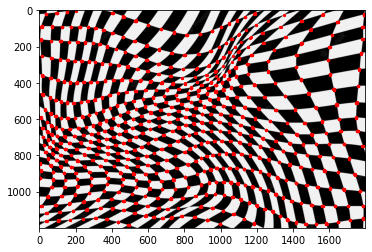

Minimum eigenvalue detector for window size:  5  , threshold:  1033544.25


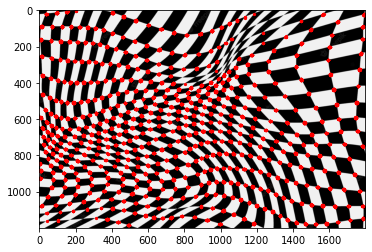

Minimum eigenvalue detector for window size:  7  , threshold:  1715836.625


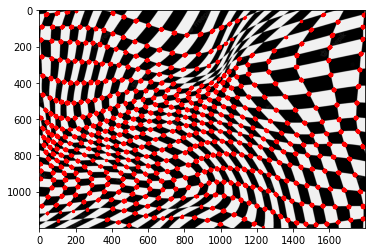

Minimum eigenvalue detector for window size:  9  , threshold:  2430189.5


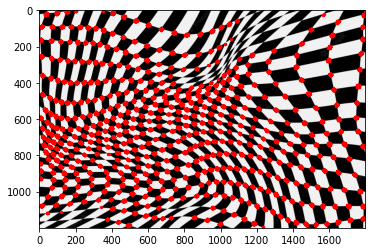

Minimum eigenvalue detector for window size:  11  , threshold:  3210933.0


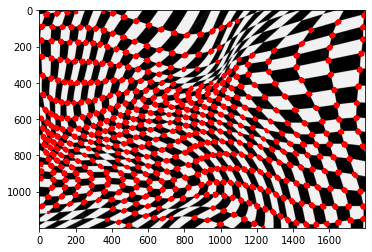

Minimum eigenvalue detector for window size:  15  , threshold:  4710146.0


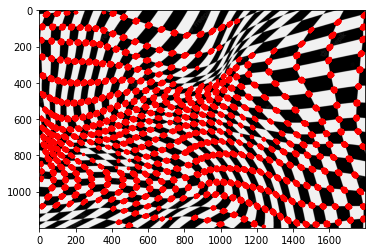

Minimum eigenvalue detector for window size:  21  , threshold:  7057075.5


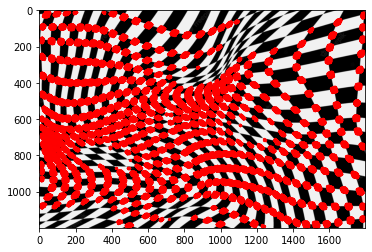

In [38]:
#run corner detector using minimum eigenvalues and save times
for size in sizes:
    start = time.time()
    h_img = cornerDetect(img, winSize=size, ehtype=0)
    #set threshold as 1/4 of max value
    threshold = 1/4*np.nanmax(h_img)
    print("Minimum eigenvalue detector for window size: ",size," , threshold: ", threshold)
    plotCorners(img, h_img, threshold)
    end = time.time()
    eig_time.append(end-start)

<strong> Corner detector using harris corner measure </strong>

/var/folders/tz/w99r9ywn0nncx417bgnc6m1m0000gn/T/ipykernel_42767/1820101535.py:65: RuntimeWarning: invalid value encountered in float_scalars
  h_values[rows,cols]= np.linalg.det(second_moment)/(np.matrix.trace(second_moment))


Harris corner detector for window size:  3  , threshold:  173110.015625


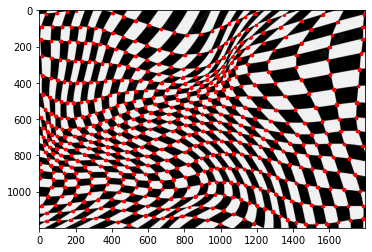

Harris corner detector for window size:  5  , threshold:  577523.25


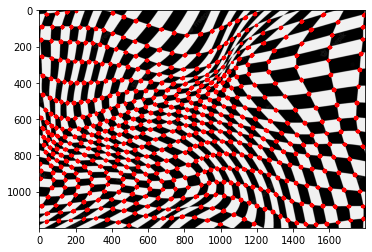

Harris corner detector for window size:  7  , threshold:  1003264.8125


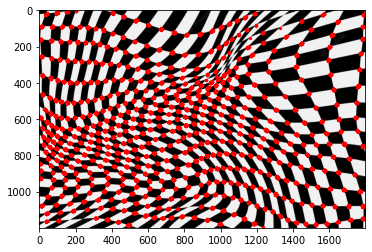

Harris corner detector for window size:  9  , threshold:  1403011.125


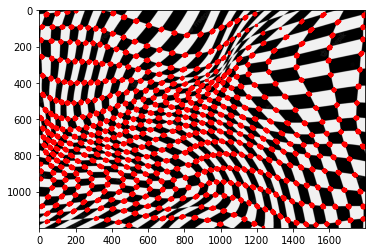

Harris corner detector for window size:  11  , threshold:  1807469.75


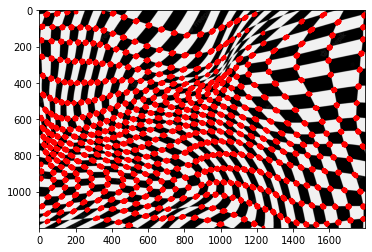

Harris corner detector for window size:  15  , threshold:  2596919.0


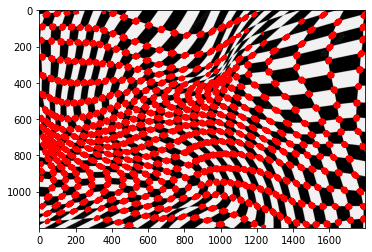

Harris corner detector for window size:  21  , threshold:  3801951.5


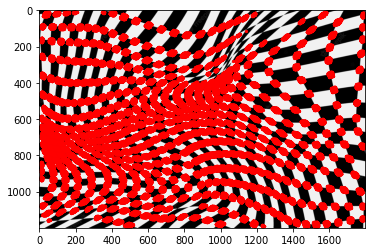

In [39]:
#run corner detector using harris corner measure and save times
for size in sizes:
    start = time.time()
    h_img = cornerDetect(img, winSize=size, ehtype=1)
    #set threshold as 1/4 of max value
    threshold = 1/4*np.nanmax(h_img)
    print("Harris corner detector for window size: ",size," , threshold: ", threshold)
    plotCorners(img, h_img, threshold)
    end = time.time()
    har_time.append(end-start)

Plot time comparison

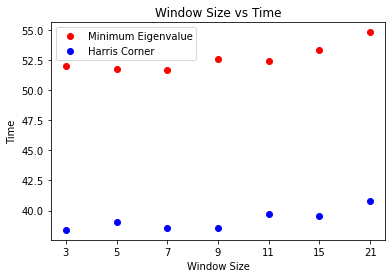

In [40]:
import pandas as pd 

#plot using pandas. Red for minimum eigenvalue detector and Blue for Harris corner measure detector.
Dataset = list(zip(sizes, eig_time, har_time))
df = pd.DataFrame(data = Dataset, columns = ['sizes', 'eig_time', 'har_time'])
df['eig_time'].plot(legend = True, label = 'Minimum Eigenvalue', marker='o', linestyle='',color='red')
df['har_time'].plot(legend = True, label = 'Harris Corner', title = \
      "Window Size vs Time", marker='o', linestyle='',color='blue')

plt.xticks(df.index,df["sizes"].values)
plt.xlabel("Window Size")
plt.ylabel("Time")

plt.show()

Compare time

In [42]:
ratios = []
for i in range(len(eig_time)):
    ratios.append(eig_time[i]/har_time[i])

av_ratio = np.mean(np.array(ratios))

print("How much Minimum Eigenvalue is slower than Harris Corner on average: ", av_ratio)
    

How much minimum eigenvalue is slower than Harris Corner on average:  1.3424061915106924
